The observed values in real-world problems are often imprecise or vague. 
Imprecise or vague data may be the result of unquantifiable, incomplete, and 
nonobtainable information. They are often expressed with bounded inter
vals, ordinal (rank order) data, or fuzzy numbers.

# Proceso General del FAHP

1. Se llenan las encuestas con la misma metodología de **Saaty** para el **AHP**. estas deben tener
un |CR| <= 0.1

2. Se define una tabla con la que va a haber una conversión de los valores precisos a los valores *fuzzy*.

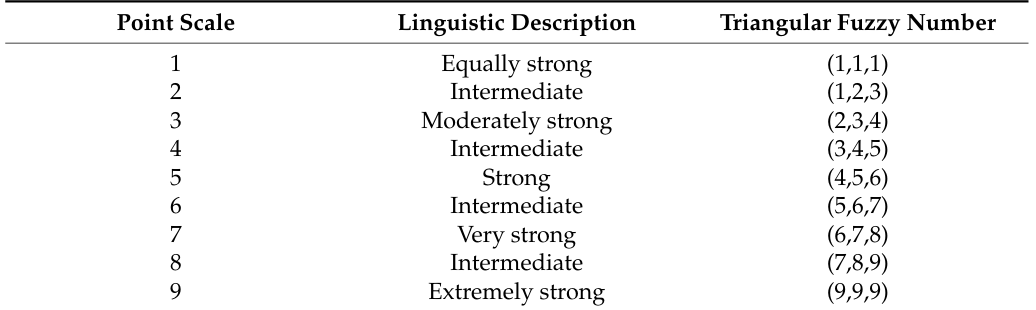

3. En caso de tener múltiples matrices, usar el método de la **media geométrica** para calcular la matriz de comparación por pares difusa agregada de todos los expertos, así consiguiendo expresar los valores en una matriz  
**n × n × 3**.

4. Por cada uno de los criterios se calcula la **media geométrica** de los valores **l, m, h** que se plantearon en el paso 2.  
De esta manera conseguimos una matriz de **n × 3**.

5. Se emplea un método de **defuzzificación**, algunos ejemplos de estos son:
<ul>
  <li>
    <strong>Centroide (Center of Area, CoA):</strong><br>
    Calcula el centro de gravedad del número difuso. Para un número triangular (l, m, u), se usa la fórmula:<br>
    <em>(l + m + u) / 3</em>.
  </li>

  <li>
    <strong>Liou &amp; Wang (1992):</strong><br>
    Introduce un índice de optimismo μ. La fórmula es:<br>
    <em>μ·l + (1 - μ)·u</em>.<br>
    Con μ = 0.5 se obtiene el promedio entre límite inferior y superior.
  </li>

  <li>
    <strong>Media aritmética simple:</strong><br>
    Para números triangulares se calcula como:<br>
    <em>(l + u) / 2</em>.<br>
    Es un método rápido y sencillo.
  </li>

  <li>
    <strong>Centroide generalizado:</strong><br>
    Variaciones del CoA que ponderan de forma distinta los extremos y el valor medio, dando más peso al juicio más probable.
  </li>

  <li>
    <strong>Métodos basados en α-cut:</strong><br>
    Se definen cortes α del número difuso y se calculan valores representativos. Menos comunes en FAHP clásico, pero presentes en aplicaciones de lógica difusa.
  </li>
</ul>

<p>
Estos métodos permiten transformar juicios difusos en pesos normalizados, que luego se aplican en análisis multicriterio y modelos GIS.
</p>

<h1>Replicación paper</h1>

<a href = "https://www.scopus.com/inward/record.uri?eid=2-s2.0-85121980249&doi=10.3390%2Fsu14010358&partnerID=40&md5=18d7d861e7205738ea2271fb2da5011e">High-Resolution Wind Farms Suitability Mapping
Using GIS and Fuzzy AHPApproach: ANational-Level Case
Study in Sudan</a>

In [2]:
import numpy as np
import pandas as pd
import random
def simulate_matrices(dm_number = 3,criteria_number = 4):
    matrices = []
    for _ in range(dm_number):
        matrix = np.ones((criteria_number,criteria_number))
        for i in range(0,len(matrix)):
            for j in range(i+1,len(matrix[0])):
                matrix[i][j] = random.randint(1,9)
                matrix[j][i] = 1/matrix[i][j]

        matrices.append(matrix)
    return matrices

In [ ]:
class Transformer:
    def calculate_weights(self, matrices):
        fuzzy_matrices = np.array([self.create_fuzzy_matrix(matrix) for matrix in matrices])
        fuzzy_matrix = self.geomean_fuzzy_matrices(fuzzy_matrices)
        matrix = self.geomean_fuzzy_matrix(fuzzy_matrix)
        weights = self.define_weights(matrix)
        return weights

    def geomean_matrices(self,matrices):
        base = np.ones((len(matrices[0]),len(matrices[0][0])))
        for matrix in matrices:
            base*=matrix
        base = base**(1/len(matrices[0]))
        return base
    
    def geomean_fuzzy_matrices(self,matrices):
        n = len(matrices[0])
        base = np.ones((n,n,3))
        for i in range(n):
            for j in range(n):
                j
                for i_matrix in range(len(matrices)):
                    base[i][j]*=matrices[i_matrix][i][j]
                base[i][j]**=(1/len(matrices))
        return base

    
    def create_fuzzy_matrix(self,matrix):
        n = len(matrix)
        fuzzy_matrix = np.empty((n,n,3))
        for i in range(n):
            for j in range(n):
                value = matrix[i][j]
                if(value<1): 
                    continue
                fuzzy_matrix[i][j] = np.array([value]*3)
                if value!= 9 and value != 1:
                    fuzzy_matrix[i][j][0]-=1
                    fuzzy_matrix[i][j][2]+=1

                fuzzy_matrix[j][i] = 1/fuzzy_matrix[i][j]
        return fuzzy_matrix
    
    def geomean_fuzzy_matrix(self,matrix):
        n = len(matrix)
        geo_mean = []
        for i in range(n):
            base = np.ones((3))
            for j in range(n):
                base *= matrix[i][j]
            geo_mean.append(base**(1/n))
        
        return geo_mean
    
    def define_weights(self, geo_mean, u = 0.6):
        ans = []
        for l , m, h in geo_mean:
            # ans.append(u*l+(1-u)*h)
            ans.append((l+m+h)/3)

        ans = np.array(ans)
        return np.array(ans/sum(ans))
    
    
    def simulate_matrices(self, dm_number = 3,criteria_number = 4):
        matrices = []
        for _ in range(dm_number):
            matrix = np.ones((criteria_number,criteria_number))
            for i in range(0,len(matrix)):
                for j in range(i+1,len(matrix[0])):
                    matrix[i][j] = random.randint(1,9)
                    matrix[j][i] = 1/matrix[i][j]

            matrices.append(matrix)
        return np.array(matrices)

In [8]:
# Matriz del Experto 1
expert1 = np.array([
    [1,    2,    3,    4,    7,    5,    7,    9],
    [1/2,  1,    1/3,  3,    5,    6,    7,    7],
    [1/3,  1/3,  1,    1,    3,    3,    5,    5],
    [1/4,  1/3,  1,    1,    2,    3,    3,    5],
    [1/7,  1/6,  1/3,  1/2,  1,    2,    3,    5],
    [1/5,  1/3,  1/3,  1/3,  1/3,  1,    1,    3],
    [1/7,  1/7,  1/5,  1/5,  1,    1,    1,    4],
    [1/9,  1/7,  1/5,  1/7,  1/7,  1/3,  1/4,  1]
])

# Matriz del Experto 2
expert2 = np.array([
    [1,    2,    5,    3,    5,    3,    7,    7],
    [1/2,  1,    2,    3,    2,    5,    7,    5],
    [1/5,  1/3,  1,    1,    2,    4,    5,    3],
    [1/3,  1/2,  1,    1,    2,    3,    3,    2],
    [1/5,  1/3,  1/2,  1/2,  1,    1,    3,    5],
    [1/3,  1/5,  1/4,  1/3,  1,    1,    1,    4],
    [1/7,  1/7,  1/5,  1/3,  1/3,  1,    1,    2],
    [1/7,  1/5,  1/3,  1/5,  1/5,  1/4,  1/2,  1]
])

# Matriz del Experto 3
expert3 = np.array([
    [1,    3,    4,    5,    7,    8,    5,    9],
    [1/3,  1,    4,    3,    4,    7,    7,    5],
    [1/4,  1/4,  1,    2,    2,    6,    3,    5],
    [1/5,  1/3,  1/2,  1,    2,    4,    5,    5],
    [1/7,  1/4,  1/2,  1/2,  1,    2,    4,    5],
    [1/8,  1/7,  1/6,  1/4,  1/2,  1,    1,    3],
    [1/5,  1/7,  1/3,  1/5,  1/4,  1,    1,    3],
    [1/9,  1/5,  1/3,  1/5,  1/7,  1/3,  1/3,  1]
])

In [9]:
transformer = Transformer()
transformer.calculate_weights([expert1,expert2,expert3])

array([5.38801798e-01, 1.31730594e-05, 5.06008213e-04, 1.70695170e-01,
       1.14232399e-01, 7.30847010e-02, 6.37310546e-02, 3.89356955e-02])